In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
from scipy.stats import norm
from scipy import stats

In [2]:
#Import the data
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


Q1: Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

In [5]:
medical.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

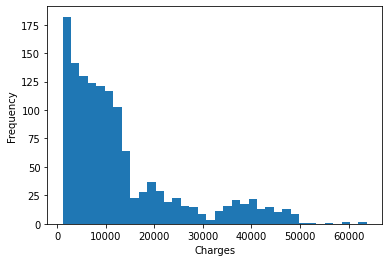

In [6]:
#Plot of the histogram of the charges column
n_bins = np.sqrt(len(medical['charges']))
n_bins = int(n_bins)
plt.hist(medical['charges'], bins = n_bins)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [7]:
#Calculation of the mean
mean = medical['charges'].mean()
print('The mean of the charges column is:', mean)

The mean of the charges column is: 13270.422265141257


In [8]:
#Calculation of the standard deviation
std = medical['charges'].std()
print('The standard deviation of the charges column is:', std)

The standard deviation of the charges column is: 12110.011236693994


In [9]:
'''Based on the standard deviation, we were able to see a really high standard deviation on the charges column.
We could be talking about a not normal distribution example and also the plot of the histogram confirm this.
The mean and the standard deviation are close on their value, but they make sense based on the plot of the 
histogram.'''

'Based on the standard deviation, we were able to see a really high standard deviation on the charges column.\nWe could be talking about a not normal distribution example and also the plot of the histogram confirm this.\nThe mean and the standard deviation are close on their value, but they make sense based on the plot of the \nhistogram.'

Q2: The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

In [10]:
'''For this model, based on the shape of the histogram, I would say an exponential distribution works good on this
model.'''

'For this model, based on the shape of the histogram, I would say an exponential distribution works good on this\nmodel.'

In [11]:
#See percentage of values under 12000. 
np.sum(medical['charges'] < 12000)/len(medical['charges'])

0.6322869955156951

In [12]:
#Probability of having 0.633 out of 1 average charge below 12,000

Q3: Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? (Refresh your understanding of this concept on p. 399 of the AoS). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

In [13]:
value1 = mean + std
value2 = mean - std
print('If we take a two sided interval, the upper bound would be:', value1, 'and the lower bound would be:', value2)

If we take a two sided interval, the upper bound would be: 25380.43350183525 and the lower bound would be: 1160.4110284472627


In [14]:
'''Based on the data above, and the data distribution I would say is better to use a one-sided interval'''

'Based on the data above, and the data distribution I would say is better to use a one-sided interval'

In [15]:
confidence_interval = norm.ppf(0.95, loc=mean, scale=std) 

In [16]:
print('The 95% confidence interval is:', confidence_interval)

The 95% confidence interval is: 33189.61817024046


In [17]:
#Values around 33189 should be a concer to the manager since it is really high compared to the average

Q4: State the null and alternative hypothesis here. Use the t-test for the difference between means and the t-test statistics
(If you need some reminding of the general definition of t-statistic, check out the definition on p. 404 of AoS).
What assumption about the variances of the two groups are we making here?

In [18]:
mean2 = medical['insuranceclaim'].mean()
std2 = medical['insuranceclaim'].std()

In [19]:
'''Null hypothesis: Insurance claim has direct relationship with the medical charges. Therefore, an insurance claim
means higher medical charges'''

'Null hypothesis: Insurance claim has direct relationship with the medical charges. Therefore, an insurance claim\nmeans higher medical charges'

In [20]:
#Assumption of difference variances and two sided interval
term1 = (len(medical['charges'])-1) * (std**2)

In [21]:
term2 = (len(medical['charges'])-1) * (std2**2)

In [22]:
term3 = (2*len(medical['charges']))-2

In [23]:
sp = np.sqrt((term1 + term2)/term3)

In [24]:
print('The pooled standard deviation is:', sp)

The pooled standard deviation is: 8563.071072803757


In [25]:
t = (mean - mean2)/(sp*np.sqrt((1/len(medical['charges']) + 1/len(medical['charges']))))

In [26]:
print('The t-statistic value is:', t)

The t-statistic value is: 40.08197386779059


In [27]:
'''We got a not statistical significative value, so therefore we refuse the hypothesis that Insurance claim has
direct relationship with higher medial charges'''

'We got a not statistical significative value, so therefore we refuse the hypothesis that Insurance claim has\ndirect relationship with higher medial charges'

Q5: Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from scipy.stats (hint, you're looking for a function to perform a t-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [28]:
stats.ttest_ind(medical['charges'],medical['insuranceclaim'], equal_var = False)

Ttest_indResult(statistic=40.08197386779056, pvalue=2.2226522931100122e-231)

In [29]:
'''A pvalue such small means statistical significance which we do not reject our Null Hypothesis'''

'A pvalue such small means statistical significance which we do not reject our Null Hypothesis'

Q6: Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above t-test for a sample, but can you see an equivalent one for performing a z-test from a sample? Comment on your answer.

I'm not able to see a z-test for a sample because with the t-test is enough to know the confidence intervals. Also, the z-score just needs the standard deviation assuming a normal distribution